In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from photutils import aperture_photometry,CircularAnnulus,CircularAperture
# from photutils import DAOStarFinder

In [2]:
image = 'hor1DRCs/jdan21010_drc.fits'

# fits.info(image)

hdu = fits.open(image)
sci_814 = hdu[1].data
hdr_814 = hdu[0].header
tab_814 = hdu[4].data
photflam_814 = hdu[1].header['PHOTFLAM']

# data = hdu[1].data[500:1000,2500:3000]
hdu.close()

In [3]:
image = 'hor1DRCs/jdan20010_drc.fits'

hdu = fits.open(image)
sci_606 = hdu[1].data
hdr_606 = hdu[0].header
tab_606 = hdu[4].data
photflam_606 = hdu[1].header['PHOTFLAM']

hdu.close()

In [4]:
temp_sci_606=sci_606*hdr_606['texptime']
temp_sci_814=sci_814*hdr_814['texptime']

In [5]:
# fits.writeto('hor1DRCs/F814W_cts_rawF.fits', \
#              temp_sci_814, header=hdr_814)
# fits.writeto('hor1DRCs/F606W_cts_rawF.fits', \
#              temp_sci_606, header=hdr_606)

In [6]:
image = 'hor1DRCs/F814W_cts_rawF.fits'

hdu = fits.open(image)
sci_814 = hdu[0].data
hdr_814 = hdu[0].header
hdu.close()

In [7]:
image = 'hor1DRCs/F606W_cts_rawF.fits'

hdu = fits.open(image)
sci_606 = hdu[0].data
hdr_606 = hdu[0].header
hdu.close()

In [8]:
data_814 = sci_814.copy()
data_606 = sci_606.copy()

In [9]:
mean_814, median_814, std_814 = sigma_clipped_stats(data_814, sigma=3.0, \
                                            maxiters=5)

mean_606, median_606, std_606 = sigma_clipped_stats(data_606, sigma=3.0, \
                                            maxiters=5)

In [10]:
pos_file = np.genfromtxt('sDRC_2606/matchedDRCaper2906_bkgd.dat',names=True)

In [11]:
catFile = np.genfromtxt('sDRC_2606/matchedDRCaper2906_bkgd.dat')

In [12]:
xpos_606 = pos_file['xr_f606w']-0.5
ypos_606 = pos_file['yr_f606w']-0.5

xpos_814 = pos_file['xr_f814w']-0.5
ypos_814 = pos_file['yr_f814w']-0.5

In [13]:
loc_606 = np.array([xpos_606,ypos_606])
positions_606 = np.transpose(loc_606)

loc_814 = np.array([xpos_814,ypos_814])
positions_814 = np.transpose(loc_814)

In [14]:
apertures_r4_606 = CircularAperture(positions_606, r=4.)

rawflux_r4_606 = aperture_photometry(temp_sci_606, apertures_r4_606)
print(rawflux_r4_606[:10])

 id  xcenter   ycenter     aperture_sum   
       pix       pix                      
--- --------- --------- ------------------
  1 4076.4058  576.1948 1424.3836390930906
  2 4109.1333 1023.4497 4655.8122321807405
  3 4109.0664 2540.4456  5003.158598249756
  4 4143.6416 2033.4398 43136.966486966536
  5 4071.4421 1742.3646 26035.445637993304
  6 3998.9187  667.9089 1836.2866793415476
  7 4002.3486  1445.111  1284.795780430452
  8 3984.6777   194.568  4684.838524227555
  9 4065.0552 1337.8058 1238.9136573888413
 10 4011.4626  259.3171  7564.474885538948


In [15]:
apertures_r4_814 = CircularAperture(positions_814, r=4.)

rawflux_r4_814 = aperture_photometry(temp_sci_814, apertures_r4_814)
print(rawflux_r4_814[:10])

 id  xcenter   ycenter     aperture_sum   
       pix       pix                      
--- --------- --------- ------------------
  1 4076.5388  576.9304  1414.656397587747
  2  4109.062 1023.0773  4459.069020572273
  3 4109.1387 2540.9719 3911.5224053204524
  4 4144.3208  2033.124  27156.60715903925
  5 4071.3171 1742.6945  18150.06792366237
  6 3999.0046   668.014 1957.9051059758294
  7 4002.3242 1444.9795   1243.66679016133
  8 3984.0483  194.3967  2798.880003701784
  9 4066.0498 1338.1512 1153.2501162276762
 10 4011.6284  259.3019   6438.32251618605


In [16]:
annulus_apertures_606 = CircularAnnulus(positions_606, r_in=9., \
                                        r_out=12.)
annulus_apertures_814 = CircularAnnulus(positions_814, r_in=9., \
                                        r_out=12.)

In [17]:
annulus_masks = annulus_apertures_606.to_mask(method='center')

bkg_median = []
for mask in annulus_masks:
    
    annulus_data = mask.multiply(data_606)
    annulus_data_1d = annulus_data[mask.data > 0]
    _, median_sigclip, _ = sigma_clipped_stats(annulus_data_1d)
    bkg_median.append(median_sigclip)

bkg_median_606 = np.array(bkg_median)

In [18]:
annulus_masks = annulus_apertures_814.to_mask(method='center')

bkg_median = []
for mask in annulus_masks:
    
    annulus_data = mask.multiply(data_814)
    annulus_data_1d = annulus_data[mask.data > 0]
    _, median_sigclip, _ = sigma_clipped_stats(annulus_data_1d)
    bkg_median.append(median_sigclip)

bkg_median_814 = np.array(bkg_median)

In [19]:
rawflux_r4_606['annulus_median'] = bkg_median_606
print(rawflux_r4_606['annulus_median'][:100])

   annulus_median  
-------------------
-1.9727246165275574
-2.7997536659240723
 -8.026102066040039
  2.208870530128479
 -5.282254219055176
 -3.375704526901245
-4.2130255699157715
  3.210157036781311
-1.2133173942565918
 2.9018325805664062
                ...
  6.734963417053223
  1.297357976436615
 -6.525614261627197
  1.846193253993988
 -5.139861822128296
-3.5453319549560547
 1.4980781078338623
-3.1878530979156494
 2.5422592163085938
 -8.080144882202148
-2.1145803928375244
Length = 100 rows


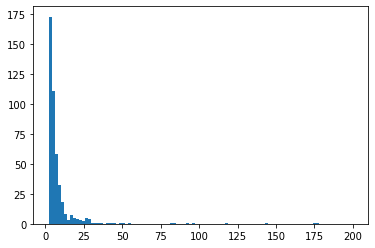

In [20]:
plt.hist(rawflux_r4_606['annulus_median'],bins=100,range=(2,200))
plt.show()

In [21]:
rawflux_r4_814['annulus_median'] = bkg_median_814
print(rawflux_r4_814['annulus_median'][:10])

   annulus_median   
--------------------
-0.24229678511619568
  -2.733426332473755
  -6.456653118133545
  -2.098410487174988
 -0.6921984851360321
 -4.6671671867370605
 -3.5457346439361572
  1.5734392404556274
  -7.230250358581543
 -0.7883654236793518


In [22]:
rawflux_r4_606['aper_bkg'] = bkg_median_606*apertures_r4_606.area
print(rawflux_r4_606['aper_bkg'][:10])

      aper_bkg     
-------------------
 -99.15995460541946
 -140.7309687796505
-403.43589260213196
 111.02994288292194
 -265.5150567836389
-169.68141667844415
-211.76976287733342
 161.36009221794794
 -60.98798419630751
 145.86201467287893


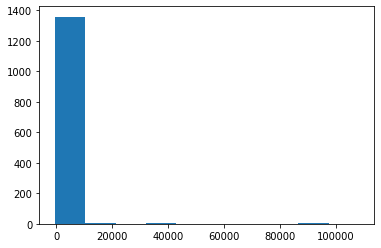

In [23]:
plt.hist(rawflux_r4_606['aper_bkg'])
plt.show()

In [24]:
rawflux_r4_814['aper_bkg'] = bkg_median_814*apertures_r4_814.area
print(rawflux_r4_814['aper_bkg'][:10])

      aper_bkg     
-------------------
 -12.17916480175144
-137.39699336365504
 -324.5467840432956
-105.47761553159553
 -34.79369081166947
-234.59741035085585
-178.22806254349845
  79.08968253896485
 -363.4320225621559
  -39.6275683740041


In [25]:
rawflux_r4_606['final_phot'] = rawflux_r4_606['aperture_sum'] \
    - rawflux_r4_606['aper_bkg']
print(rawflux_r4_606['final_phot'][:10])

    final_phot    
------------------
  1523.54359369851
 4796.543200960391
 5406.594490851889
 43025.93654408361
26300.960694776943
2005.9680960199917
1496.5655433077854
 4523.478432009608
1299.9016415851488
 7418.612870866069


In [26]:
rawflux_r4_814['final_phot'] = rawflux_r4_814['aperture_sum'] \
    - rawflux_r4_814['aper_bkg']
print(rawflux_r4_814['final_phot'][:10])

    final_phot    
------------------
1426.8355623894986
4596.4660139359285
 4236.069189363748
27262.084774570845
18184.861614474037
2192.5025163266855
1421.8948527048285
 2719.790321162819
1516.6821387898322
 6477.950084560054


In [27]:
EEVband = 0.839 #4 pix rad
EEIband  = 0.830 #4 pix rad

# ZPV = 26.667
# ZPI = 26.779

ZPV = 21.1
ZPI = 21.1

In [28]:
mask_negative = (rawflux_r4_606['final_phot'] > 0) 
rawflux_pos_r4_606 = rawflux_r4_606[mask_negative]

In [29]:
mask_negative = (rawflux_r4_814['final_phot'] > 0) 
rawflux_pos_r4_814 = rawflux_r4_814[mask_negative]

In [30]:
other_606 = -2.5*np.log10(photflam_606/hdr_606['texptime']/EEVband)
other_814 = -2.5*np.log10(photflam_814/hdr_814['texptime']/EEIband)

In [31]:
print(-2.5*np.log10(photflam_606)-21.1)

26.66733400012398


In [32]:
rawflux_r4_606.dtype.names

('id',
 'xcenter',
 'ycenter',
 'aperture_sum',
 'annulus_median',
 'aper_bkg',
 'final_phot')

In [33]:
final_phot_606 = -2.5*np.log10(rawflux_pos_r4_606['final_phot']) \
    + other_606 - ZPV
print(final_phot_606[:10])

    final_phot    
------------------
 27.68285043754539
26.437666750000957
26.307678157092234
 24.05566182000657
24.590058620327518
 27.38417759722133
27.702248296261615
26.501306341102428
 27.85521142043391
 25.96418087927264


In [34]:
final_phot_814 = -2.5*np.log10(rawflux_pos_r4_814['final_phot']) \
    + other_814 - ZPI
print(final_phot_814[:10])

    final_phot    
------------------
 27.85420439313252
26.584079072702444
26.672731593494333
 24.65124154609955
25.090864204847385
27.387788954787844
 27.85797050082177
 27.15380064614355
27.787902775162685
26.211545212833926


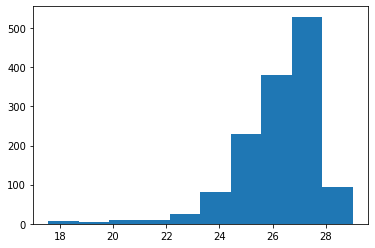

In [35]:
plt.hist(final_phot_814)
plt.show()

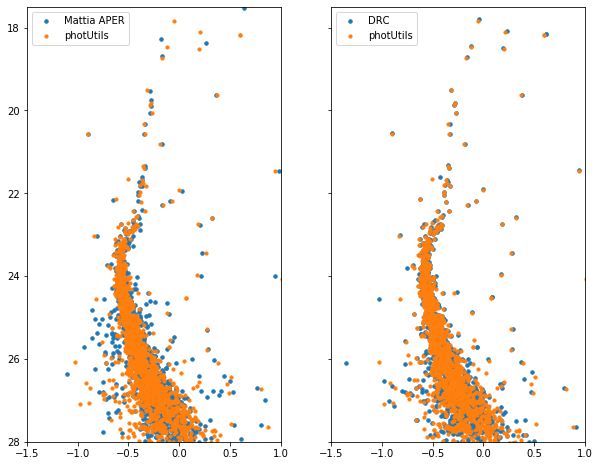

In [36]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,8),sharex=True,sharey=True)


ax1.scatter(pos_file['m606cAPER']-pos_file['m814cAPER'],pos_file['m606cAPER'],s=12,label='Mattia APER')
ax1.scatter(final_phot_606-final_phot_814,final_phot_606,s=10,label='photUtils')

ax2.scatter(pos_file['magr_f606w']-pos_file['magr_f814w'],pos_file['magr_f606w'],s=12,label='DRC')
ax2.scatter(final_phot_606-final_phot_814,final_phot_606,s=10,label='photUtils')

ax1.set_ylim(28,17.5)
ax1.set_xlim(-1.5,1)

ax1.legend()
ax2.legend()

plt.show()

In [37]:
len(pos_file)

1368

In [38]:
len(final_phot_606)

1368

In [39]:
newCol = np.zeros((len(pos_file),4))
newCol[:,0] = final_phot_606
newCol[:,1] = final_phot_814
newCol[:,2] = rawflux_r4_606['aper_bkg']
newCol[:,3] = rawflux_r4_814['aper_bkg']

In [40]:
colNs = np.array(pos_file.dtype.names)
s0 = ' '
header = s0.join(colNs)
header += ' pUmag_f606w pUmag_f814w pUbkg_f606w pUbkg_f814w'

In [41]:
print(header)

xPSF yPSF m606cPSF m814cPSF s606PSF s814PSF nstarPSF nstarAPER idAPER xAPER yAPER m606cAPER m814cAPER s606APER s814APER sky606APER sky814APER ra dec flags_f606w RA_f606w DEC_f606w xr_f606w yr_f606w flux_f606w bkgd_f606w c_star_f606w magr_f606w id_f606w xr_f814w_trans yr_f814w_trans flags_f814w RA_f814w DEC_f814w xr_f814w yr_f814w flux_f814w bkgd_f814w _star_f814w magr_f814w id_f814w xAPER_trans yAPER_trans pUmag_f606w pUmag_f814w pUbkg_f606w pUbkg_f814w


In [42]:
outArr = np.hstack((catFile,newCol))

In [43]:
# np.savetxt('photUtils0820/matchedPast.dat',outArr,header=header)

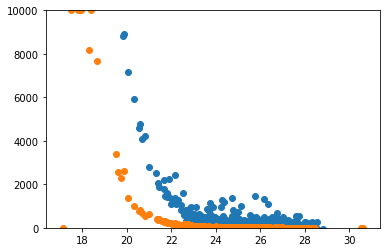

In [44]:
fig,ax = plt.subplots(figsize=(6,4))

ax.scatter(final_phot_606,rawflux_r4_606['aper_bkg'])
ax.scatter(pos_file['m606cAPER'],pos_file['sky606APER'])

ax.set_ylim(0,10000)
plt.show()